# Data Wrangling GIT713 Task

Takunda Charles Mudima, 23969156

# Task 1: Data Cleaning and Presentation 


In this task I visualised, inspected and manipulated the provided data. I worked with two datasets.

1. Voter Turnout Report ( Local government election 2021, Wc, All municipalities) 
2. MDB Wards 2020 (https://dataportal-mdb-sa.opendata.arcgis.com/datasets/e0223a825ea2481fa72220ad3204276b/about

The following cells illustrate some of the functions and procedures implemented to tidy the dataset. 

In [237]:
#importing the necessary packages
import arcgis
import pandas as pd
import os
import arcpy

In [238]:
# Reading in the data and visualisation
IEC = pd.read_excel(r"C:\Users\charl\Desktop\4th year Honours\GIT713\IEC_Data_Project\Resources\Voters_data.xlsx")

# Methods used to understand the data

In order to work with any data it is important to understand the dataset and the information it contains.

In [239]:
IEC.head()

,Municipality,Registered Voters,MEC7 Votes,Voter Turnout,% Voter Turnout
0,CPT - City of Cape Town,1973708,6625,933965,0.471620
1,WC011 - Matzikama,31765,33,17131,0.538745
2,WC012 - Cederberg,27147,47,14913,0.548393
3,WC013 - Bergrivier,27541,0,15041,0.546131
4,WC014 - Saldanha Bay,61441,107,31445,0.510902


In [240]:
IEC.tail()

,Municipality,Registered Voters,MEC7 Votes,Voter Turnout,% Voter Turnout
20,WC047 - Bitou,30863,83,19902,0.643120
21,WC048 - Knysna,42790,57,23906,0.557939
22,WC051 - Laingsburg,4770,27,3286,0.685011
23,WC052 - Prince Albert,8073,4,5714,0.707441
24,WC053 - Beaufort West,26878,66,15486,0.574748


In [241]:
IEC.describe()

,Registered Voters,MEC7 Votes,Voter Turnout,% Voter Turnout
count,2.500000e+01,25.000000,25.000000,25.000000
mean,1.244772e+05,403.440000,60954.600000,0.541716
std,3.864599e+05,1308.304694,182487.834034,0.075455
min,4.770000e+03,0.000000,3286.000000,0.431027
25%,2.714700e+04,33.000000,15041.000000,0.474636
50%,4.359900e+04,83.000000,21055.000000,0.546131
75%,6.144100e+04,197.000000,34982.000000,0.581415
max,1.973708e+06,6625.000000,933965.000000,0.707441


In [242]:
IEC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Municipality       25 non-null     object 
 1   Registered Voters  25 non-null     int64  
 2   MEC7 Votes         25 non-null     int64  
 3   Voter Turnout      25 non-null     int64  
 4   % Voter Turnout    25 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [243]:
print(IEC.columns)

Index(['Municipality', 'Registered Voters', 'MEC7 Votes', 'Voter Turnout',
       '% Voter Turnout'],
      dtype='object')


In [244]:
IEC["Voter Turnout"].min()

3286

# Methods used for visualisation

The 'Municipality' column in the dataset contained information which could be split.

In [245]:
# Splitting the data
IEC[['CAT', 'Muncipality']] = IEC['Municipality'].str.split(' - ',expand =True)

In [246]:
# Renaming the columnns 
new_IEC = {col: col.replace(' ', '_') for col in IEC.columns}

Formated_IEC = IEC.rename(columns=new_IEC)

In [247]:
# Re-arranging column headings for the dataset
Format_IEC_data = Formated_IEC.reindex(columns = ['CAT','Muncipality','Registered_Voters','Voter_Turnout','MEC7_Votes','%_Voter_Turnout'])  

Format_IEC_data.head()

,CAT,Muncipality,Registered_Voters,Voter_Turnout,MEC7_Votes,%_Voter_Turnout
0,CPT,City of Cape Town,1973708,933965,6625,0.471620
1,WC011,Matzikama,31765,17131,33,0.538745
2,WC012,Cederberg,27147,14913,47,0.548393
3,WC013,Bergrivier,27541,15041,0,0.546131
4,WC014,Saldanha Bay,61441,31445,107,0.510902


In [248]:
# Exporting data to excel
Format_IEC_data.to_excel(r"C:\Users\charl\Desktop\4th year Honours\GIT713\Formated_Voters_Data.xlsx", index=False)

After implementing, and manipulating the dataset, the final output file can be located at:
https://docs.google.com/spreadsheets/d/1BoFR8bi9IdCa5C_yq86mtA5vGbz5QLNr/edit?usp=share_link&ouid=117928087168331757240&rtpof=true&sd=true


# Task 2 : Choropleth Map

In this task I made a choropleth map displaying the percentage of registered non-voters for the Western Cape Province. I made use of my formated and edited data with the MDB wards data. This task involved calculating additional columns, joining a dataset to a dataframe, and converting dataframes to feature classes.

In [ ]:
# Reading in the data 
IEC = pd.read_excel(r"Z:\DW Task\IEC_Data_Project\IEC_Data_Project\Resources\Voters_data.xlsx")

In [ ]:
# Spliting the municipality data
IEC[['CAT', 'Municipality']] = IEC['Municipality'].str.split(' - ',expand =True)

In [ ]:
#Calculating the % voter turnout
IEC['%_Non_voters'] = (1 - IEC['% Voter Turnout'])
IEC['%_Non_voters'] = IEC['%_Non_voters'].astype(float)
IEC.head()

In [ ]:
#Renamed my columns by adding an underscore where there is spaces in the name
new_IEC_columns = {col: col.replace(' ', '_') for col in IEC.columns}

IEC = IEC.rename(columns=new_IEC_columns)

format_IEC_data = IEC.reindex(columns = ['CAT','Municipality','Registered_Voters','Voter_Turnout','MEC7_Votes','%_Voter_Turnout', '%_Non_voters'])  


For this section it was important to note that the were the same lenght as the key. I struggled in trying to debug that specific error, and it was a result of having different number of columns with the key.

In [ ]:
# Create variables that represent the ArcGIS Pro project and map
aprx = arcpy.mp.ArcGISProject("CURRENT")
mp = aprx.listMaps('Map')[0]

# Create a variable that represents the default file geodatabase
wcdb = r"IEC_task.gdb"
aprx.defaultGeodatabase = wcdb
arcpy.env.workspace = wcdb


In [ ]:
# Create a variable that represents the county geometry dataset
wc_name = "Wc_mdb"
wc_shp = os.path.join(wcdb, wc_name)

# Load the dataset into a spatially-enabled dataframe
wc_df = pd.DataFrame.spatial.from_featureclass(wc_shp)
wc_df.head()

In [ ]:
# Modify the dataframe to only include the attributes that are needed
wc_df = wc_df[['OBJECTID', 'CAT_B', 'OBJECTID','District','SHAPE', 'Shape__Are', 'Shape__Len']]
wc_df.head()

# Join the election dataframe with the county geometry dataframe
merged = pd.merge(format_IEC_data, wc_df, left_on='CAT', right_on='CAT_B', how='left')

In [ ]:
# Joining the dataset to the data frame
merged.head()

output_fc_name = 'WC_merged'
output_fc = merged.spatial.to_featureclass(os.path.join(wcdb, output_fc_name))
output_fc

# Percentage of registered non-voters in WC 

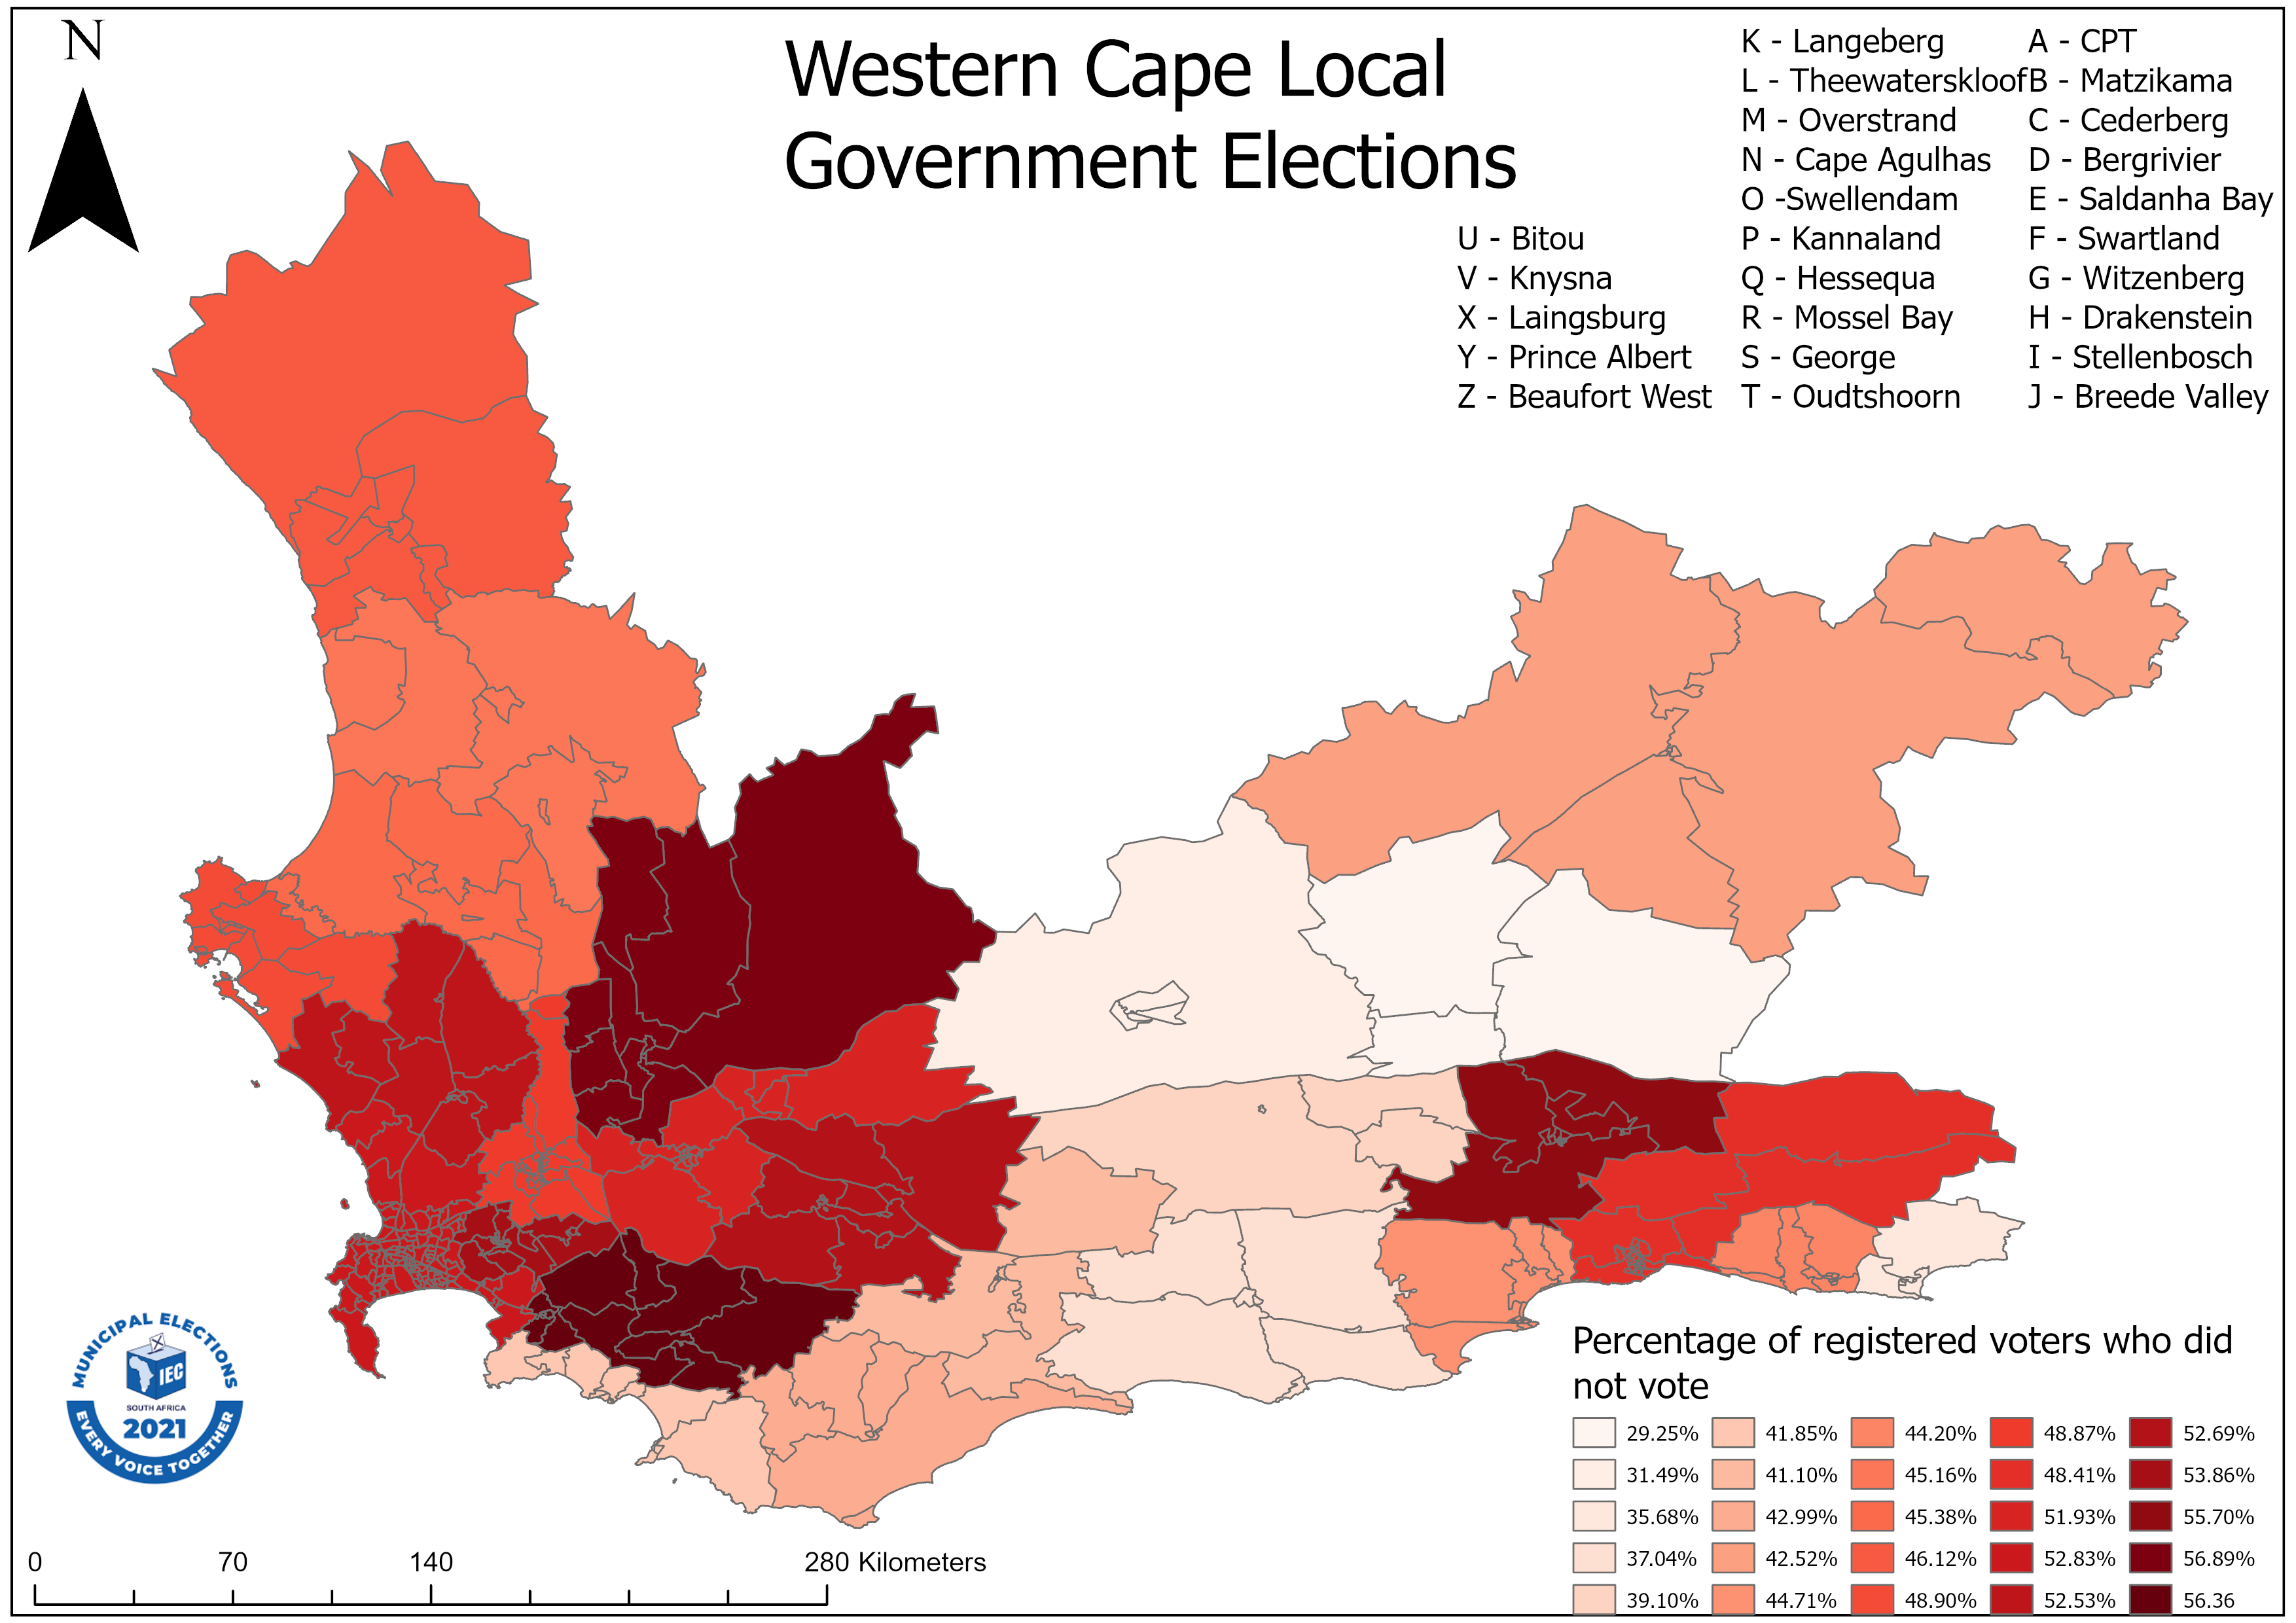

The merged dataset was symbolised based on the "%_non_voters" column. Please do not this is not an official produced by the IEC of SA.

# Task 3 : Multiple Attribute Proportional Symbol Map

For this task I created a two multivariate maps, one showing the weighted total votes per municipality and the second showing the total valid votes for the political party that came first and second.

In [ ]:
import arcgis
import pandas as pd
import os
import arcpy

In [ ]:
wc_ward = pd.read_csv(r"C:\Users\charl\Desktop\4th year Honours\GIT713\DW task 3\Resources\WP.csv")
wc_ward.head()

In [ ]:
wc_ward[['Ward','Ward_no']] = wc_ward['Ward'].str.split(' ', expand = True)
wc_ward[['CAT', 'Municipality']] = wc_ward['Municipality'].str.split(' - ', expand = True)

In [ ]:
wc_ward = wc_ward.reindex(columns = ['PartyName','Municipality', 'Ward_no', 'CAT','Province',
                                     'BallotType', 'SpoiltVotes','VotingStationName', 'RegisteredVoters', 
                                   'DateGenerated', 'Ward', 'VotingDistrict','TotalValidVotes'])  

In [ ]:
# Group the data by municipality and political party
grouped = wc_ward.groupby(['CAT', 'PartyName'])['TotalValidVotes'].sum().reset_index()
grouped.info()

In [ ]:
grouped["Rank"] = grouped.groupby('CAT')["TotalValidVotes"].rank(method='dense', ascending = True)

# First Place

This section of the code we calculated the party that came first in each municipality based on the total valid votes that each party received. 

In [ ]:
# # Group by CAT column and select the row with the highest rank (i.e., the winning party) for each group
winners = grouped.loc[grouped.groupby('CAT')["Rank"].idxmax()]

# Merge the winners DataFrame with the original grouped DataFrame to add the winning party names as a new column
grouped = pd.merge(grouped, winners[['CAT', 'PartyName']], on='CAT', suffixes=('', '_winner'))

In [ ]:
# Filter the wc_ward DataFrame to only include rows for the winning category (CAT) and select PartyName and TotalValidVotes columns
winning_votes = wc_ward[wc_ward['CAT'].isin(winners['CAT'])][['PartyName', 'TotalValidVotes']]

# Group by PartyName and sum the TotalValidVotes column
winning_votes = winning_votes.groupby('PartyName')['TotalValidVotes'].sum().reset_index()

# Merge the winning_votes DataFrame with the grouped DataFrame based on the PartyName column
grouped = pd.merge(grouped, winning_votes, on='PartyName', suffixes=('', '_votes'))

grouped.info()

# Second Place

This section of the code we calculate the party that came second in each municipality based on the total valid votes that each party received. 

In [ ]:
# sort the grouped DataFrame by CAT and TotalValidVotes
grouped = grouped.sort_values(['CAT', 'TotalValidVotes'], ascending=[True, False])

# use groupby and apply to get the second highest TotalValidVotes for each CAT
second_highest_votes = grouped.groupby('CAT')['TotalValidVotes'].apply(lambda x: x.nlargest(2).iloc[-1]).reset_index()

# merge the second_highest_votes DataFrame with the grouped DataFrame to get the PartyName for each CAT
second_place = pd.merge(grouped, second_highest_votes, on=['CAT', 'TotalValidVotes'])

# filter the second_place DataFrame to only include the rows where TotalValidVotes equals the second highest TotalValidVotes for that CAT
second_place = second_place[second_place['TotalValidVotes'] == second_place['TotalValidVotes']]

# select the PartyName and CAT columns
second_place = second_place[['PartyName', 'CAT', 'TotalValidVotes']]


In [ ]:
aprx = arcpy.mp.ArcGISProject("CURRENT")
mp = aprx.listMaps('MAP1')[0]

# Create a variable that represents the default file geodatabase
fgdb = r"DW_Task3_Pro.gdb"
aprx.defaultGeodatabase = fgdb
arcpy.env.workspace = fgdb

In [ ]:
counties_fc_name = "Wc_MDB"
counties_fc = os.path.join(fgdb, counties_fc_name)

In [ ]:
counties_df = pd.DataFrame.spatial.from_featureclass(counties_fc)
counties_df.head()
counties_df.columns

In [ ]:
# Only merge one data frame at a time. So comment out the dataframe you dont want to obtain

# This line below merges the dataframe with the party that came first with the counties data frame 
geo_df = pd.merge(grouped, counties_df, left_on='CAT', right_on="CAT_B", how='left')


#This line below merges the dataframe with the parties that came second with the counties data frame
# geo_df = pd.merge(second_place, counties_df, left_on='CAT', right_on="CAT_B", how='left')

In [ ]:
# Visualize the merged data
geo_df.head()

In [ ]:
# Printing out the final shapefile
out_2016_fc_name = "ELECTIONRESULTS_SECOND"
out_2016_fc = geo_df.spatial.to_featureclass(os.path.join(fgdb, out_2016_fc_name))
out_2016_fc

After exporting the two different tables (first position and second position), I made use of the dissovle tool to merge the "CAT", and calculated the Total valid votes for each party per municipality. Below is an image that show the parameters i used to dissolve the tables.

I symbolised my maps based on the winning party for each municipality. 

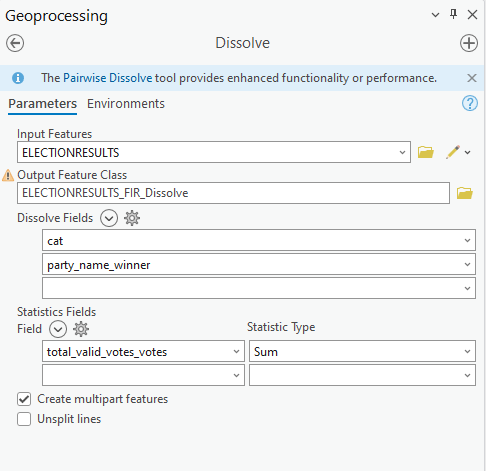

# Proportional Symbol Map Showing The Weighted Total Votes

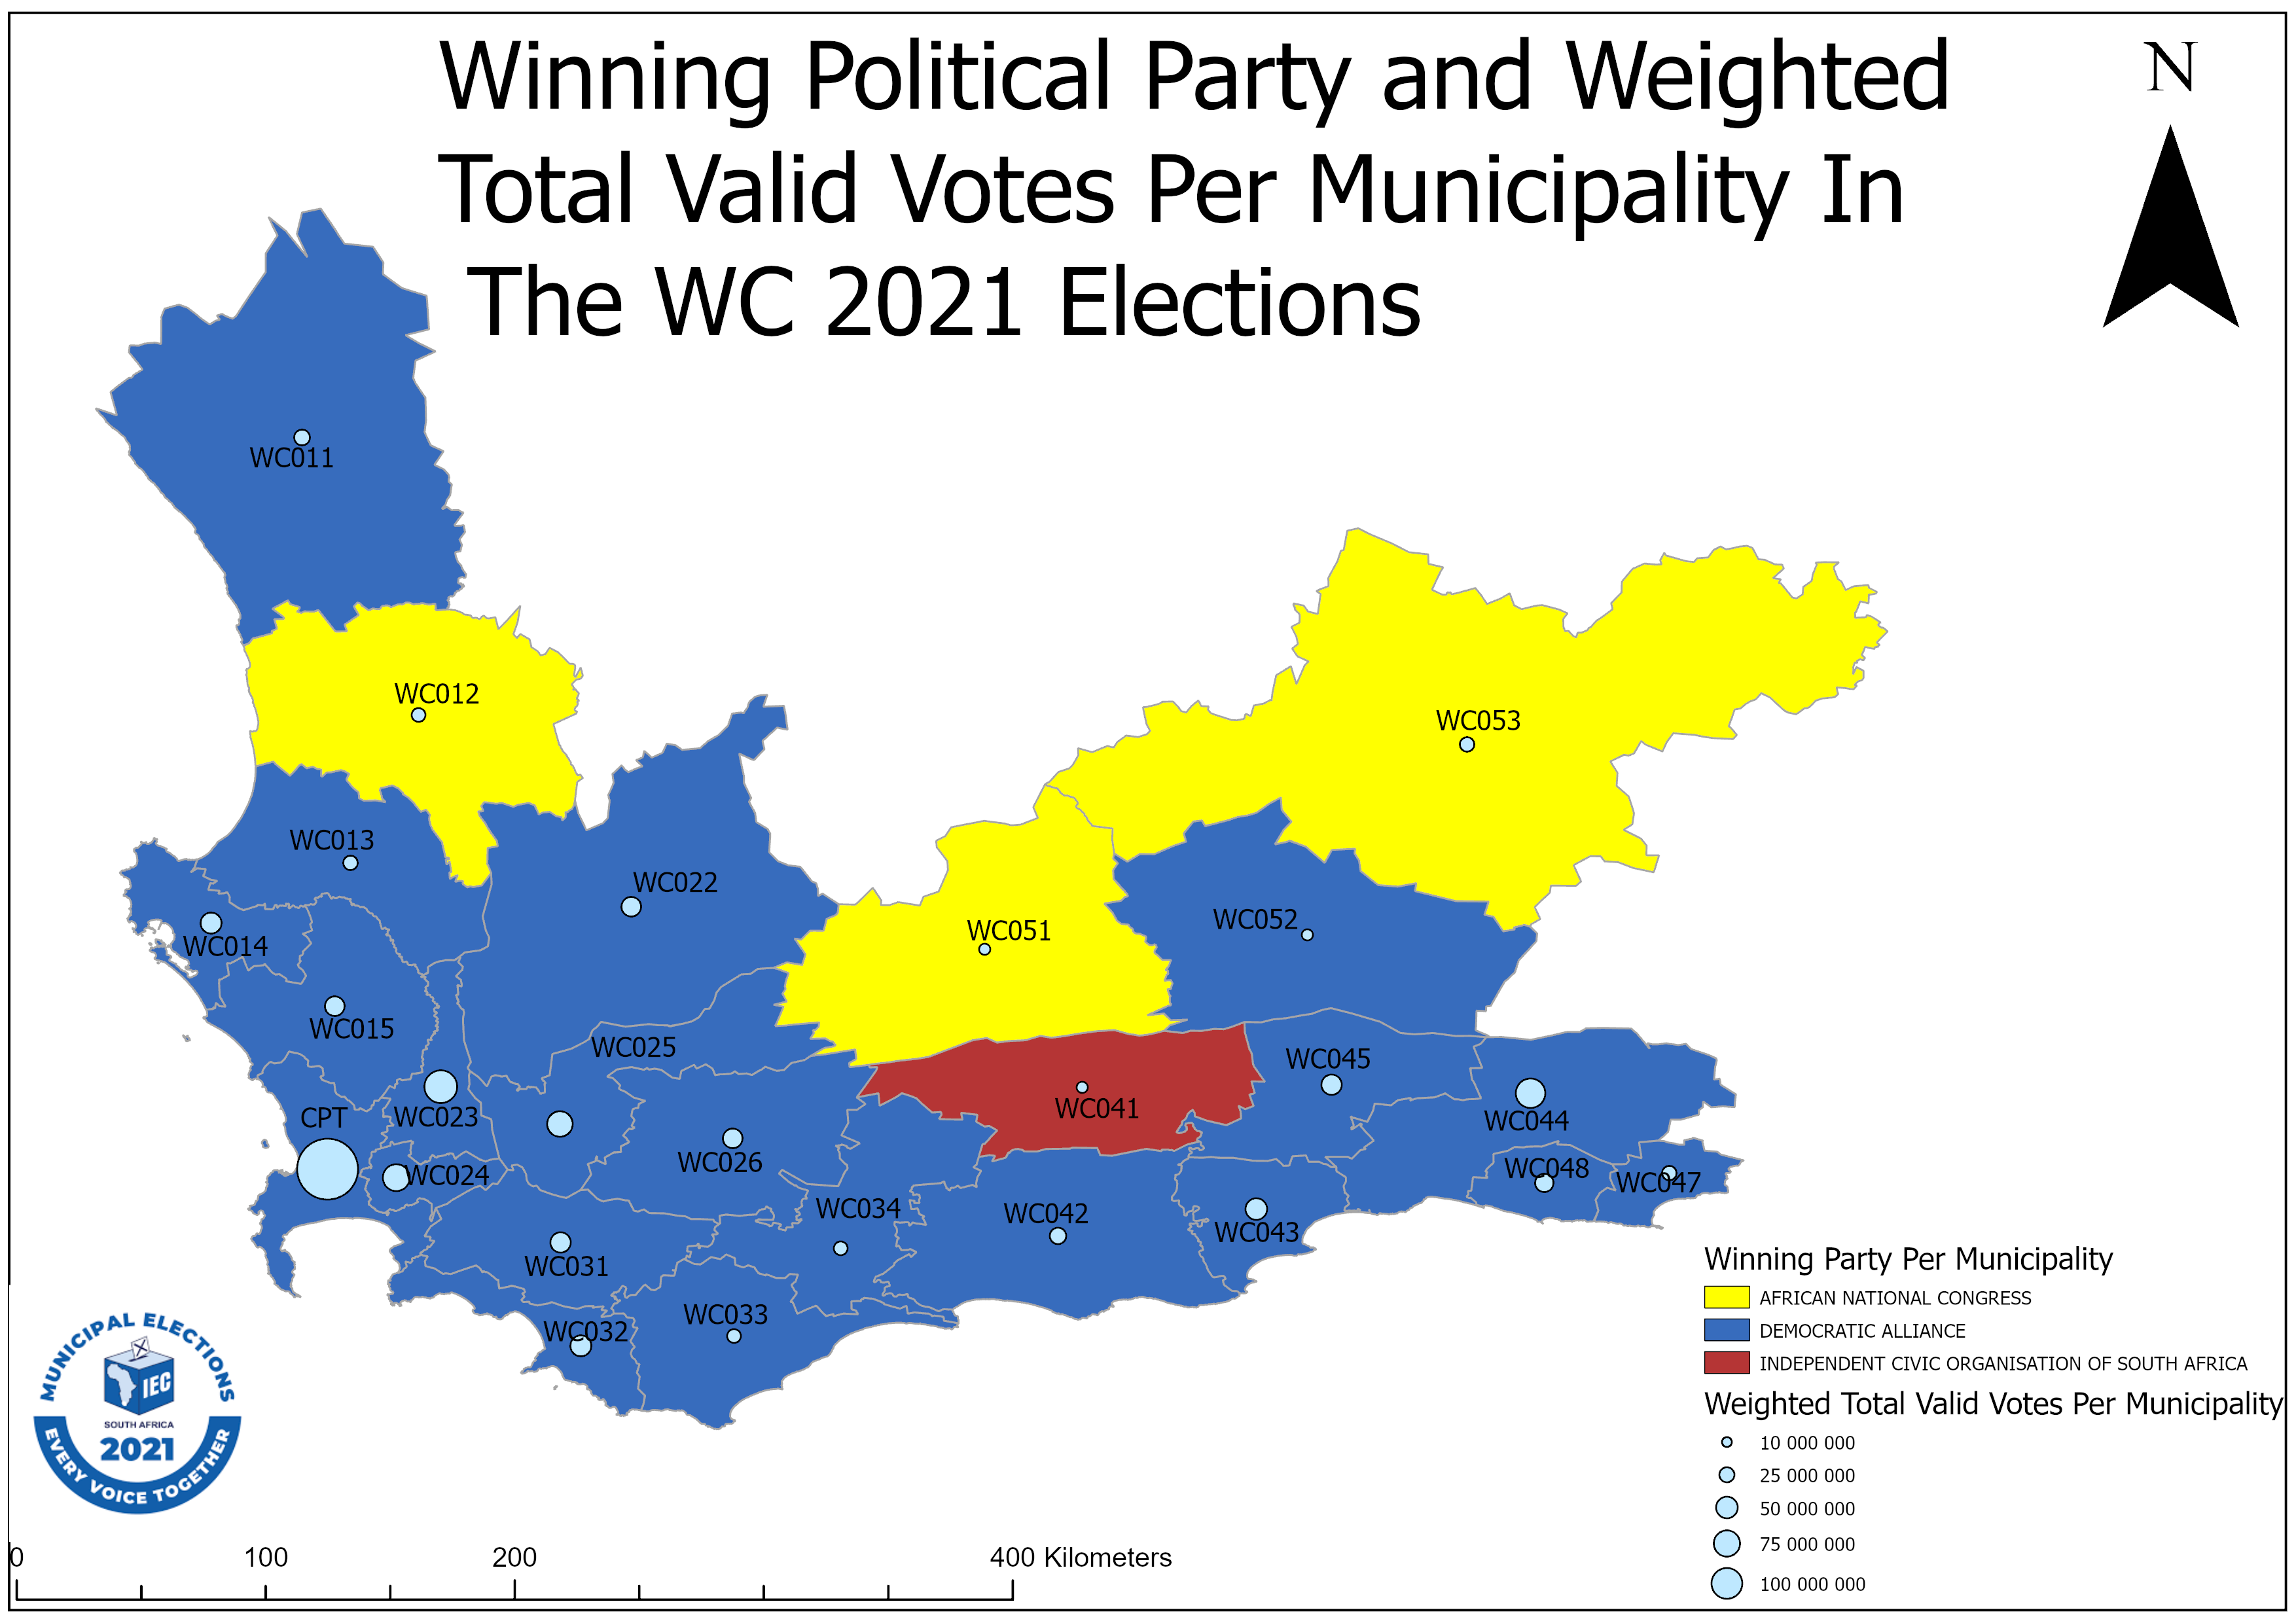

# First and Second Position 

![First Postion and Second Position Total Valid Votes.png](<attachment:First Postion and Second Position Total Valid Votes.png>)
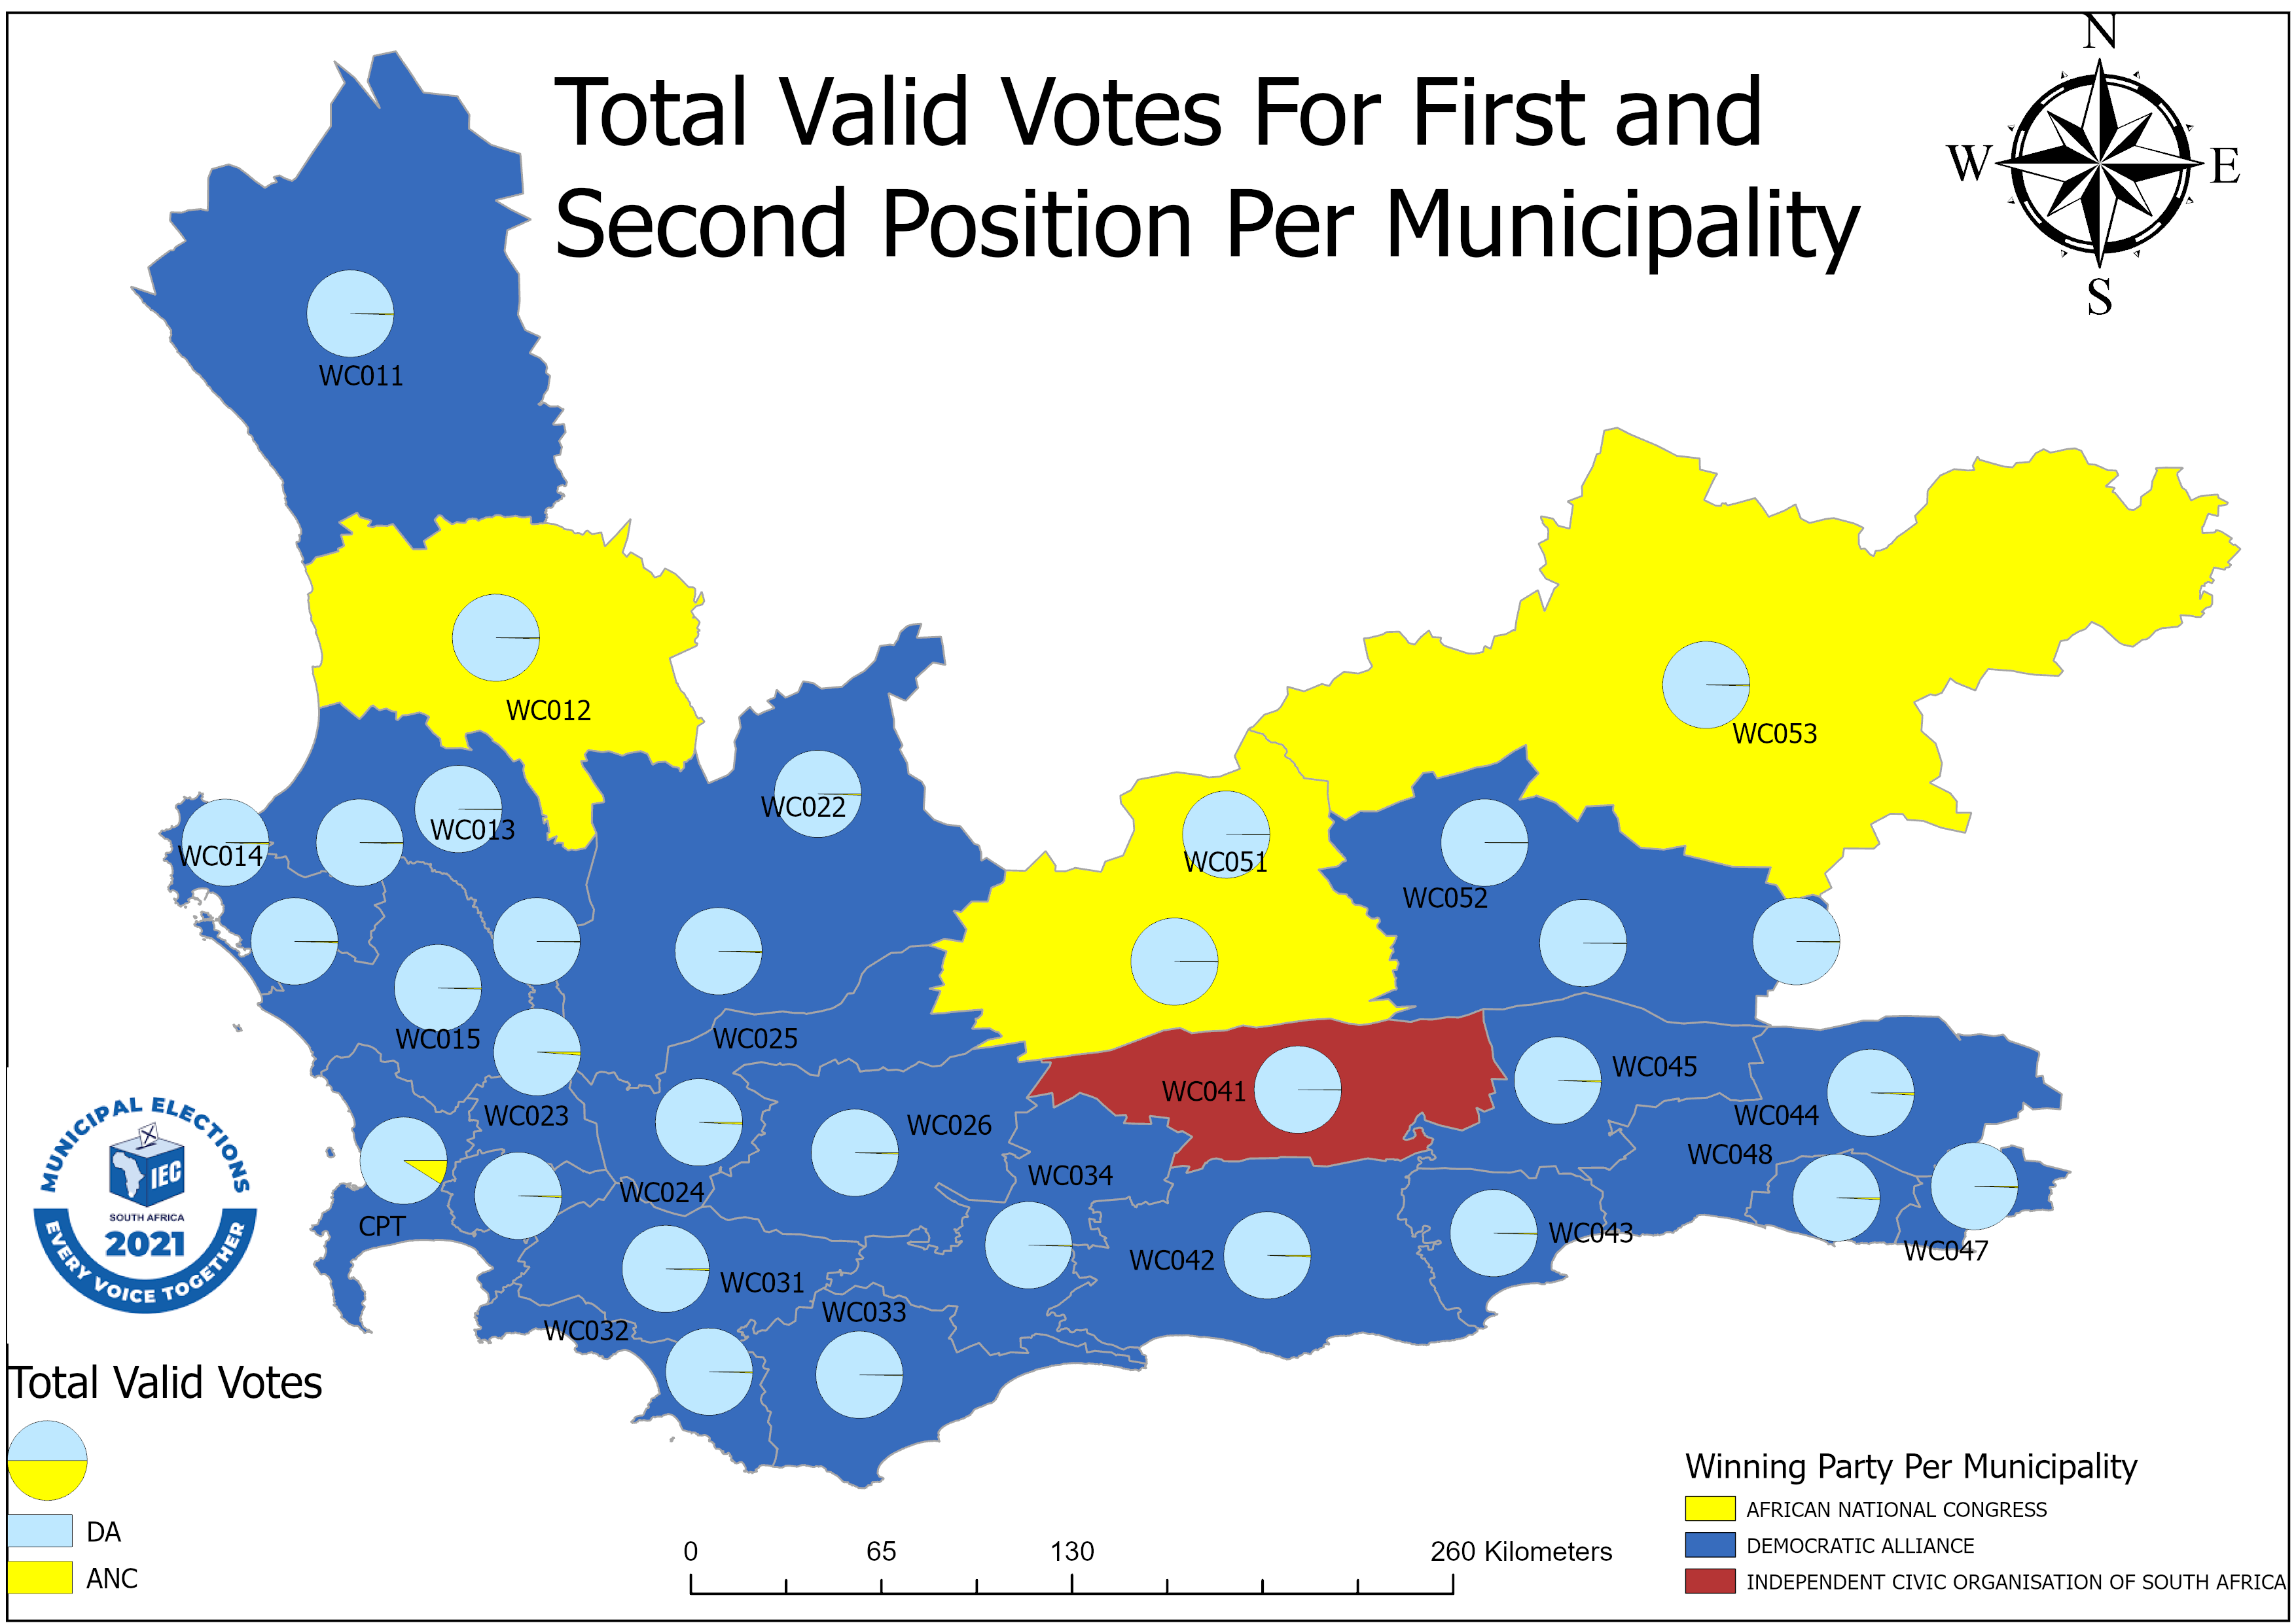